In [2]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import r2_score

In [3]:
df = pd.read_csv('data/FuelConsumption.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


This study aims to observe and estimate the carbon emission according to engine size by using basic linear regression. Because we don't need the columns except for both CO2EMISSIONS and ENGINESIZE, we are going to study on both columns we won't drop. Therefore, both we will dispose of empty columns and we will deal with the loss of time. In brief, we aim to decrease memory cost here.

In [5]:
cdf = df[['CO2EMISSIONS', 'ENGINESIZE']]
cdf.head()

,CO2EMISSIONS,ENGINESIZE
0,196,2.0
1,221,2.4
2,136,1.5
3,255,3.5
4,244,3.5


#### Split Data Train & Test Data
*Split Data Train & Test Data topic is the milestone of all machine learning algorithms. This algoritm aims to form 2 data sets that are composed of same data set. Train and test splited data sets are consisted of obeying some rules in our main data set.*<br>

**Train Set:** *This data set is used to train the machine learning algorithm.*<br>
**Test Set:** * After machine learning algorithm is trained, this algorithm will be run. After it is run, Test set will be used in the stage of testing obtained outputs.*<br>

*Points to take into consideration:*<br>

1. While this process uses 80% of our raw data set as train set, it also uses 20% of our raw data set as test set. These percentage values are the best practice. The reason is obvious that we attempt to reserve the most of our data set as train set so that our machine learning will be able to be trained by various, different datas. Thus, results we will obtain increases productivity.<br>

 2. Be careful while seperating row data set, it must be seperated homogeneously. It necessitates the data set must have quailty, variety, and data outline so that ML algorithm will have successfull results.<br>

In [14]:
msk =  np.random.rand(len(df)) <= 0.80
x = len(df)
# We have counted the whole rows (index) of df data and assigned to 80%. 
# This function will return true with 80% chance for relevant row while being counted per index. 
# Otherwise, it will return false for relevant row.
print(x)
print(msk)
train = cdf[msk]
test = cdf[~msk]
# We have trained the row equal to true.
# We have tested the row equal to false.
print(f'Train Set Shape: {train.shape}')
print(f'Test Set Shape: {test.shape}')

1067
[ True  True  True ...  True  True  True]
Train Set Shape: (852, 2)
Test Set Shape: (215, 2)


In [7]:
test.head()
# We have 197 rows here.

,CO2EMISSIONS,ENGINESIZE
0,196,2.0
10,225,2.4
13,359,5.9
18,359,5.9
20,230,2.0


In [8]:
train.head()
# We have 870 rows here.

,CO2EMISSIONS,ENGINESIZE
1,221,2.4
2,136,1.5
3,255,3.5
4,244,3.5
5,230,3.5


### Tense or Flow, Sklearn, Ibm Libraries

In [24]:
# We will take instance of LinearRegression() class in sklearn module the following row:
regr = linear_model.LinearRegression()

# Following 2 rows, we will transform ENGINSIZE and CO2EMISSION columns into array through asanarray()
# function which it is located in numpy library.
# Our aim or logic is a data construction which is needed in order to carry out formulas while we perform
# regression. However, all values must be included in calculation one by one while we are performing
# regression.

train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

# We will find the coefficient of linear line with fit() function that belongs to LinearRegression()
# class following row:

regr.fit(train_x, train_y)

# We have founded coefficients of linear line. We will print these coefficients:

print('Coefficient: %.2f' % regr.coef_[0][0])
print('Intercept %.2f' % regr.intercept_[0])

Coefficient: 38.65
Intercept 126.44


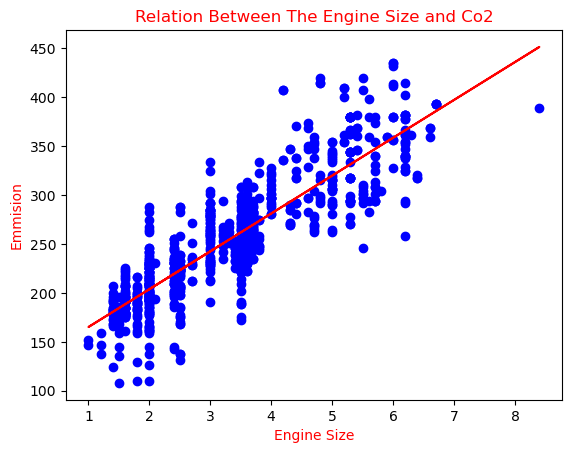

In [25]:
plt.scatter(train['ENGINESIZE'], train['CO2EMISSIONS'], color='b')
plt.plot(train_x, regr.coef_[0][0] * train_x + regr.intercept_[0], color='r')
plt.title('Relation Between The Engine Size and Co2', color='r')
plt.xlabel('Engine Size', color='r')
plt.ylabel('Emmision', color='r')
plt.show()

In [11]:
# Let's test manually while taking enginsize information taken by the user.
# We will think of this step like that: Client types into a enginsize information through UI and
# Co2 result will be returned. For this process, we will use linear line's formula:

x = float(input('Please type into engine size: '))
y = regr.intercept_ + regr.coef_ * x
print(f'Estimated Carbon Emision Value: {math.floor(y[0][0])}')

Please type into engine size:  15


Estimated Carbon Emision Value: 709


In [12]:
test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_pred = regr.predict(test_x)
test_pred

array([[203.57196275],
       [219.12682715],
       [355.23189061],
       [355.23189061],
       [203.57196275],
       [203.57196275],
       [203.57196275],
       [281.34628473],
       [281.34628473],
       [289.12371693],
       [242.45912374],
       [242.45912374],
       [242.45912374],
       [390.2303355 ],
       [203.57196275],
       [242.45912374],
       [296.90114912],
       [359.12060671],
       [242.45912374],
       [296.90114912],
       [296.90114912],
       [296.90114912],
       [203.57196275],
       [296.90114912],
       [265.79142033],
       [265.79142033],
       [203.57196275],
       [203.57196275],
       [203.57196275],
       [265.79142033],
       [242.45912374],
       [265.79142033],
       [366.8980389 ],
       [265.79142033],
       [366.8980389 ],
       [195.79453055],
       [293.01243303],
       [331.89959401],
       [312.45601352],
       [223.01554325],
       [219.12682715],
       [203.57196275],
       [331.89959401],
       [195

In [13]:
print('r2 Score: %.2f' % r2_score(test_pred, test_y))
# The best possible score is 1.0

r2 Score: 0.68
